## Disease Prediction from Symptoms
Santosh Kumar Paital (1HK20CS143)

For this project THE DATASET used from: http://people.dbmi.columbia.edu/~friedma/Projects/DiseaseSymptomKB/index.html

Copy the data from all the columns and paste it into an excel sheet -> `raw_data.xlsx`

In [1]:
# Import Dependencies
import csv
import pandas as pd
import numpy as np
from collections import defaultdict
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
# Read Raw Dataset
df = pd.read_excel('/content/drive/MyDrive/raw_data.xlsx')

In [4]:
df.head()

Disease  Count of Disease Occurrence  \
0  UMLS:C0020538_hypertensive disease                       3363.0   
1                                 NaN                          NaN   
2                                 NaN                          NaN   
3                                 NaN                          NaN   
4                                 NaN                          NaN   

                             Symptom  
0           UMLS:C0008031_pain chest  
1  UMLS:C0392680_shortness of breath  
2            UMLS:C0012833_dizziness  
3             UMLS:C0004093_asthenia  
4                 UMLS:C0085639_fall

In [5]:
# Fill all NaN with the values above
data = df.fillna(method='ffill')

In [6]:
data.head()

Disease  Count of Disease Occurrence  \
0  UMLS:C0020538_hypertensive disease                       3363.0   
1  UMLS:C0020538_hypertensive disease                       3363.0   
2  UMLS:C0020538_hypertensive disease                       3363.0   
3  UMLS:C0020538_hypertensive disease                       3363.0   
4  UMLS:C0020538_hypertensive disease                       3363.0   

                             Symptom  
0           UMLS:C0008031_pain chest  
1  UMLS:C0392680_shortness of breath  
2            UMLS:C0012833_dizziness  
3             UMLS:C0004093_asthenia  
4                 UMLS:C0085639_fall

In [7]:
# Process Disease and Symptom Names
def process_data(data):
    data_list = []
    data_name = data.replace('^','_').split('_')
    n = 1
    for names in data_name:
        if (n % 2 == 0):
            data_list.append(names)
        n += 1
    return data_list

In [8]:
# Data Cleanup
disease_list = []
disease_symptom_dict = defaultdict(list)
disease_symptom_count = {}
count = 0

for idx, row in data.iterrows():

    # Get the Disease Names
    if (row['Disease'] !="\xc2\xa0") and (row['Disease'] != ""):
        disease = row['Disease']
        disease_list = process_data(data=disease)
        count = row['Count of Disease Occurrence']

    # Get the Symptoms Corresponding to Diseases
    if (row['Symptom'] !="\xc2\xa0") and (row['Symptom'] != ""):
        symptom = row['Symptom']
        symptom_list = process_data(data=symptom)
        for d in disease_list:
            for s in symptom_list:
                disease_symptom_dict[d].append(s)
            disease_symptom_count[d] = count

In [9]:
# See that the data is Processed Correctly
disease_symptom_dict

defaultdict(list,
            {'hypertensive disease': ['pain chest',
              'shortness of breath',
              'dizziness',
              'asthenia',
              'fall',
              'syncope',
              'vertigo',
              'sweat',
              'sweating increased',
              'palpitation',
              'nausea',
              'angina pectoris',
              'pressure chest'],
             'diabetes': ['polyuria',
              'polydypsia',
              'shortness of breath',
              'pain chest',
              'asthenia',
              'nausea',
              'orthopnea',
              'rale',
              'sweat',
              'sweating increased',
              'unresponsiveness',
              'mental status changes',
              'vertigo',
              'vomiting',
              'labored breathing'],
             'depression mental': ['feeling suicidal',
              'suicidal',
              'hallucinations auditory',
              'feel

In [10]:
# Count of Disease Occurence w.r.t each Disease
disease_symptom_count

{'hypertensive disease': 3363.0,
 'diabetes': 1421.0,
 'depression mental': 1337.0,
 'depressive disorder': 1337.0,
 'coronary arteriosclerosis': 1284.0,
 'coronary heart disease': 1284.0,
 'pneumonia': 1029.0,
 'failure heart congestive': 963.0,
 'accident\xa0cerebrovascular': 885.0,
 'asthma': 835.0,
 'myocardial infarction': 759.0,
 'hypercholesterolemia': 685.0,
 'infection': 630.0,
 'infection urinary tract': 597.0,
 'anemia': 544.0,
 'chronic obstructive airway disease': 524.0,
 'dementia': 504.0,
 'insufficiency renal': 445.0,
 'confusion': 408.0,
 'degenerative\xa0polyarthritis': 405.0,
 'hypothyroidism': 398.0,
 'anxiety state': 390.0,
 'malignant neoplasms': 354.0,
 'primary malignant neoplasm': 354.0,
 'acquired\xa0immuno-deficiency syndrome': 350.0,
 'HIV': 350.0,
 'hiv infections': 350.0,
 'cellulitis': 341.0,
 'gastroesophageal reflux disease': 325.0,
 'septicemia': 311.0,
 'systemic infection': 311.0,
 'sepsis (invertebrate)': 311.0,
 'deep vein thrombosis': 310.0,
 'deh

In [11]:
# Save cleaned data as CSV
f = open('/cleaned_data.csv', 'w')

with f:
    writer = csv.writer(f)
    for key, val in disease_symptom_dict.items():
        for i in range(len(val)):
            writer.writerow([key, val[i], disease_symptom_count[key]])

In [12]:
# Read Cleaned Data as DF
df = pd.read_csv('/cleaned_data.csv')
df.columns = ['disease', 'symptom', 'occurence_count']
df.head()

disease              symptom  occurence_count
0  hypertensive disease  shortness of breath           3363.0
1  hypertensive disease            dizziness           3363.0
2  hypertensive disease             asthenia           3363.0
3  hypertensive disease                 fall           3363.0
4  hypertensive disease              syncope           3363.0

import numpy as np
from google.colab import autoviz

def categorical_histogram(df, colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  df.groupby(colname).size().plot(kind='barh', color=sns.palettes.mpl_palette(mpl_palette_name), figsize=(8*figscale, 4.8*figscale))
  plt.gca().spines[['top', 'right',]].set_visible(False)
  return autoviz.MplChart.from_current_mpl_state()

chart = categorical_histogram(_df_0, *['symptom'], **{})
chart

import numpy as np
from google.colab import autoviz

def time_series_multiline(df, timelike_colname, value_colname, series_colname, figscale=1, mpl_palette_name='Dark2'):
  from matplotlib import pyplot as plt
  import seaborn as sns
  figsize = (10 * figscale, 5.2 * figscale)
  palette = list(sns.palettes.mpl_palette(mpl_palette_name))
  def _plot_series(series, series_name, series_index=0):
    if value_colname == 'count()':
      counted = (series[timelike_colname]
                 .value_counts()
                 .reset_index(name='counts')
                 .rename({'index': timelike_colname}, axis=1)
                 .sort_values(timelike_colname, ascending=True))
      xs = counted[timelike_colname]
      ys = counted['counts']
    else:
      xs = series[timelike_colname]
      ys = series[value_colname]
    plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

  fig, ax = plt.subplots(figsize=figsize, layout='constrained')
  df = df.sort_values(timelike_colname, ascending=True)
  if series_colname:
    for i, (series_name, series) in enumerate(df.groupby(series_colname)):
      _plot_series(series, series_name, i)
    fig.legend(title=series_colname, bbox_to_anchor=(1, 1), loc='upper left')
  else:
    _plot_series(df, '')
  sns.despine(fig=fig, ax=ax)
  plt.xlabel(timelike_colname)
  plt.ylabel(value_colname)
  return autoviz.MplChart.from_current_mpl_state()

chart = time_series_multiline(_df_1, *['occurence_count', 'count()', 'symptom'], **{})
chart

In [13]:
# Remove any rows with empty values
df.replace(float('nan'), np.nan, inplace=True)
df.dropna(inplace=True)

In [14]:
from sklearn import preprocessing

In [15]:
n_unique = len(df['symptom'].unique())
n_unique

404

In [16]:
df.dtypes

disease             object
symptom             object
occurence_count    float64
dtype: object

In [17]:
# Encode the Labels
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

label_encoder = LabelEncoder()
integer_encoded = label_encoder.fit_transform(df['symptom'])
print(integer_encoded)

[328  87  28 ... 361 130 122]


In [18]:
# One Hot Encode the Labels
onehot_encoder = OneHotEncoder(sparse=False)
integer_encoded = integer_encoded.reshape(len(integer_encoded), 1)
onehot_encoded = onehot_encoder.fit_transform(integer_encoded)
print(onehot_encoded)

[[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [19]:
onehot_encoded[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [20]:
len(onehot_encoded[0])

404

In [21]:
cols = np.asarray(df['symptom'].unique())
cols

array(['shortness of breath', 'dizziness', 'asthenia', 'fall', 'syncope',
       'vertigo', 'sweat', 'sweating increased', 'palpitation', 'nausea',
       'angina pectoris', 'pressure chest', 'polyuria', 'polydypsia',
       'pain chest', 'orthopnea', 'rale', 'unresponsiveness',
       'mental status changes', 'vomiting', 'labored breathing',
       'feeling suicidal', 'suicidal', 'hallucinations auditory',
       'feeling hopeless', 'weepiness', 'sleeplessness',
       'motor retardation', 'irritable mood', 'blackout',
       'mood depressed', 'hallucinations visual', 'worry', 'agitation',
       'tremor', 'intoxication', 'verbal auditory hallucinations',
       'energy increased', 'difficulty', 'nightmare',
       'unable to concentrate', 'homelessness', 'hypokinesia',
       'dyspnea on exertion', 'chest tightness', 'cough', 'fever',
       'decreased translucency', 'productive cough', 'pleuritic pain',
       'yellow sputum', 'breath sounds decreased', 'chill', 'rhonchus',
       '

In [22]:
# Create a new dataframe to save OHE labels
df_ohe = pd.DataFrame(columns = cols)
df_ohe.head()

Empty DataFrame
Columns: [shortness of breath, dizziness, asthenia, fall, syncope, vertigo, sweat, sweating increased, palpitation, nausea, angina pectoris, pressure chest, polyuria, polydypsia, pain chest, orthopnea, rale, unresponsiveness, mental status changes, vomiting, labored breathing, feeling suicidal, suicidal, hallucinations auditory, feeling hopeless, weepiness, sleeplessness, motor retardation, irritable mood, blackout, mood depressed, hallucinations visual, worry, agitation, tremor, intoxication, verbal auditory hallucinations, energy increased, difficulty, nightmare, unable to concentrate, homelessness, hypokinesia, dyspnea on exertion, chest tightness, cough, fever, decreased translucency, productive cough, pleuritic pain, yellow sputum, breath sounds decreased, chill, rhonchus, green sputum, non-productive cough, wheezing, haemoptysis, distress respiratory, tachypnea, malaise, night sweat, jugular venous distention, dyspnea, dysarthria, speech slurred, facial paresis, hemiplegia, seizure, numbness, symptom aggravating factors, st segment elevation, st segment depression, t wave inverted, presence of q wave, chest discomfort, bradycardia, pain, nonsmoker, erythema, hepatosplenomegaly, pruritus, diarrhea, abscess bacterial, swelling, apyrexial, dysuria, hematuria, renal angle tenderness, lethargy, hyponatremia, hemodynamically stable, difficulty passing urine, consciousness clear, guaiac positive, monoclonal, ecchymosis, tumor cell invasion, haemorrhage, pallor, ...]
Index: []

[0 rows x 404 columns]

In [23]:
for i in range(len(onehot_encoded)):
    df_ohe.loc[i] = onehot_encoded[i]

In [24]:
df_ohe.head()

shortness of breath  dizziness  asthenia  fall  syncope  vertigo  sweat  \
0                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   
1                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   
2                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   
3                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   
4                  0.0        0.0       0.0   0.0      0.0      0.0    0.0   

   sweating increased  palpitation  nausea  ...  feces in rectum  prodrome  \
0                 0.0          0.0     0.0  ...              0.0       0.0   
1                 0.0          0.0     0.0  ...              0.0       0.0   
2                 0.0          0.0     0.0  ...              0.0       0.0   
3                 0.0          0.0     0.0  ...              0.0       0.0   
4                 0.0          0.0     0.0  ...              0.0       0.0   

   hypoproteinemia  alcohol binge episode  abdomen acute  air fluid level  \
0              0.0                    0.0            0.0              0.0   
1              0.0                    0.0            0.0              0.0   
2              0.0                    0.0            0.0              0.0   
3              0.0                    0.0            0.0              0.0   
4              0.0                    0.0            0.0              0.0   

   catching breath  large-for-dates fetus  immobile  homicidal thoughts  
0              0.0                    0.0       0.0                 0.0  
1              0.0                    0.0       0.0                 0.0  
2              0.0                    0.0       0.0                 0.0  
3              0.0                    0.0       0.0                 0.0  
4              0.0                    0.0       0.0                 0.0  

[5 rows x 404 columns]

In [25]:
len(df_ohe)

2126

In [26]:
# Disease Dataframe
df_disease = df['disease']
df_disease.head()

0    hypertensive disease
1    hypertensive disease
2    hypertensive disease
3    hypertensive disease
4    hypertensive disease
Name: disease, dtype: object

In [27]:
# Concatenate OHE Labels with the Disease Column
df_concat = pd.concat([df_disease,df_ohe], axis=1)
df_concat.head()

disease  shortness of breath  dizziness  asthenia  fall  \
0  hypertensive disease                  0.0        0.0       0.0   0.0   
1  hypertensive disease                  0.0        0.0       0.0   0.0   
2  hypertensive disease                  0.0        0.0       0.0   0.0   
3  hypertensive disease                  0.0        0.0       0.0   0.0   
4  hypertensive disease                  0.0        0.0       0.0   0.0   

   syncope  vertigo  sweat  sweating increased  palpitation  ...  \
0      0.0      0.0    0.0                 0.0          0.0  ...   
1      0.0      0.0    0.0                 0.0          0.0  ...   
2      0.0      0.0    0.0                 0.0          0.0  ...   
3      0.0      0.0    0.0                 0.0          0.0  ...   
4      0.0      0.0    0.0                 0.0          0.0  ...   

   feces in rectum  prodrome  hypoproteinemia  alcohol binge episode  \
0              0.0       0.0              0.0                    0.0   
1              0.0       0.0              0.0                    0.0   
2              0.0       0.0              0.0                    0.0   
3              0.0       0.0              0.0                    0.0   
4              0.0       0.0              0.0                    0.0   

   abdomen acute  air fluid level  catching breath  large-for-dates fetus  \
0            0.0              0.0              0.0                    0.0   
1            0.0              0.0              0.0                    0.0   
2            0.0              0.0              0.0                    0.0   
3            0.0              0.0              0.0                    0.0   
4            0.0              0.0              0.0                    0.0   

   immobile  homicidal thoughts  
0       0.0                 0.0  
1       0.0                 0.0  
2       0.0                 0.0  
3       0.0                 0.0  
4       0.0                 0.0  

[5 rows x 405 columns]

In [28]:
df_concat.drop_duplicates(keep='first',inplace=True)

In [29]:
df_concat.head()

disease  shortness of breath  dizziness  asthenia  fall  \
0  hypertensive disease                  0.0        0.0       0.0   0.0   
1  hypertensive disease                  0.0        0.0       0.0   0.0   
2  hypertensive disease                  0.0        0.0       0.0   0.0   
3  hypertensive disease                  0.0        0.0       0.0   0.0   
4  hypertensive disease                  0.0        0.0       0.0   0.0   

   syncope  vertigo  sweat  sweating increased  palpitation  ...  \
0      0.0      0.0    0.0                 0.0          0.0  ...   
1      0.0      0.0    0.0                 0.0          0.0  ...   
2      0.0      0.0    0.0                 0.0          0.0  ...   
3      0.0      0.0    0.0                 0.0          0.0  ...   
4      0.0      0.0    0.0                 0.0          0.0  ...   

   feces in rectum  prodrome  hypoproteinemia  alcohol binge episode  \
0              0.0       0.0              0.0                    0.0   
1              0.0       0.0              0.0                    0.0   
2              0.0       0.0              0.0                    0.0   
3              0.0       0.0              0.0                    0.0   
4              0.0       0.0              0.0                    0.0   

   abdomen acute  air fluid level  catching breath  large-for-dates fetus  \
0            0.0              0.0              0.0                    0.0   
1            0.0              0.0              0.0                    0.0   
2            0.0              0.0              0.0                    0.0   
3            0.0              0.0              0.0                    0.0   
4            0.0              0.0              0.0                    0.0   

   immobile  homicidal thoughts  
0       0.0                 0.0  
1       0.0                 0.0  
2       0.0                 0.0  
3       0.0                 0.0  
4       0.0                 0.0  

[5 rows x 405 columns]

In [30]:
len(df_concat)

2097

In [31]:
cols = df_concat.columns
cols

Index(['disease', 'shortness of breath', 'dizziness', 'asthenia', 'fall',
       'syncope', 'vertigo', 'sweat', 'sweating increased', 'palpitation',
       ...
       'feces in rectum', 'prodrome', 'hypoproteinemia',
       'alcohol binge episode', 'abdomen acute', 'air fluid level',
       'catching breath', 'large-for-dates fetus', 'immobile',
       'homicidal thoughts'],
      dtype='object', length=405)

In [32]:
cols = cols[1:]

In [33]:
# Since, every disease has multiple symptoms, combine all symptoms per disease per row
df_concat = df_concat.groupby('disease').sum()
df_concat = df_concat.reset_index()
df_concat[:5]

disease  shortness of breath  dizziness  \
0                  Alzheimer's disease                  0.0        0.0   
1                                  HIV                  0.0        0.0   
2       Pneumocystis carinii pneumonia                  0.0        0.0   
3             accident cerebrovascular                  0.0        0.0   
4  acquired immuno-deficiency syndrome                  0.0        0.0   

   asthenia  fall  syncope  vertigo  sweat  sweating increased  palpitation  \
0       0.0   0.0      0.0      0.0    0.0                 0.0          0.0   
1       0.0   0.0      0.0      0.0    0.0                 0.0          0.0   
2       0.0   0.0      0.0      0.0    0.0                 0.0          0.0   
3       0.0   0.0      0.0      0.0    0.0                 0.0          0.0   
4       0.0   0.0      0.0      0.0    0.0                 0.0          0.0   

   ...  feces in rectum  prodrome  hypoproteinemia  alcohol binge episode  \
0  ...              0.0       0.0              0.0                    0.0   
1  ...              0.0       0.0              0.0                    0.0   
2  ...              0.0       0.0              0.0                    0.0   
3  ...              0.0       0.0              0.0                    0.0   
4  ...              0.0       0.0              0.0                    0.0   

   abdomen acute  air fluid level  catching breath  large-for-dates fetus  \
0            0.0              1.0              0.0                    0.0   
1            0.0              0.0              0.0                    0.0   
2            0.0              0.0              0.0                    0.0   
3            0.0              0.0              0.0                    0.0   
4            0.0              0.0              0.0                    0.0   

   immobile  homicidal thoughts  
0       0.0                 0.0  
1       0.0                 0.0  
2       0.0                 1.0  
3       0.0                 0.0  
4       0.0                 0.0  

[5 rows x 405 columns]

In [34]:
len(df_concat)

149

In [35]:
df_concat.to_csv("/training_dataset.csv", index=False)

In [36]:
# One Hot Encoded Features
X = df_concat[cols]

# Labels
y = df_concat['disease']

## Model Training

In [37]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

In [38]:
len(X_train), len(y_train)

(119, 119)

In [39]:
len(X_test), len(y_test)

(30, 30)

In [40]:
dt = DecisionTreeClassifier()
clf_dt=dt.fit(X, y)

In [41]:
clf_dt.score(X, y)

0.9731543624161074

In [42]:
export_graphviz(dt,
                out_file='/tree.dot',
                feature_names=cols)

In [43]:
!pip install graphviz

In [44]:
from graphviz import Source
from sklearn import tree

graph = Source(export_graphviz(dt,
                out_file=None,
                feature_names=cols))

png_bytes = graph.pipe(format='png')

with open('tree.png','wb') as f:
    f.write(png_bytes)

In [45]:
from IPython.display import Image
Image(png_bytes)

In [46]:
disease_pred = clf_dt.predict(X)

In [47]:
disease_real = y.values

In [48]:
for i in range(0, len(disease_real)):
    if disease_pred[i]!=disease_real[i]:
        print ('Pred: {0}\nActual: {1}\n'.format(disease_pred[i], disease_real[i]))

Pred: coronary arteriosclerosis
Actual: coronary heart disease

Pred: depression mental
Actual: depressive disorder

Pred: malignant neoplasms
Actual: primary malignant neoplasm

Pred: septicemia
Actual: systemic infection



In [49]:
# Initialize the Naive Bayes classifier
naive_bayes_classifier = MultinomialNB()

# Train the model on the training data
naive_bayes_classifier.fit(X, y)

clf = DecisionTreeClassifier()
clf.fit(X, y)
#dt = DecisionTreeClassifier()
#clf_dt=dt.fit(X, y)


DecisionTreeClassifier()

In [50]:
naive_bayes_classifier.score(X, y)
clf.score(X, y)

0.9731543624161074

In [51]:
from sklearn.metrics import accuracy_score
naive_bayes_predictions = naive_bayes_classifier.predict(X_test)
y_pred = clf.predict(X_test)

In [52]:
naive_bayes_accuracy = accuracy_score(y_test, naive_bayes_predictions)
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy of Naive Bayes Model: {naive_bayes_accuracy*100:.2f}%')
print(f'Accuracy of the model: {accuracy * 100:.2f}%')

Accuracy of Naive Bayes Model: 96.67%
Accuracy of the model: 96.67%


In [53]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import MultinomialNB
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

# Load your dataset (replace 'your_dataset.csv' with your data file)
#data = pd.read_csv('your_dataset.csv')

# Assuming your dataset has a target column named 'chronic_disease' and features
#X = data.drop('chronic_disease', axis=1)
#y = data['chronic_disease']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101)

len(X_train), len(y_train)



(119, 119)

In [54]:

logistic_regression = LogisticRegression()
logistic_regression.fit(X, y)
random_forest = RandomForestClassifier()
random_forest.fit(X, y)
svm_classifier = SVC()
svm_classifier.fit(X, y)
#knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier = KNeighborsClassifier(n_neighbors=5)
knn_classifier.fit(X, y)

KNeighborsClassifier()

In [55]:

logistic_regression.score(X, y)
random_forest.score(X, y)
svm_classifier.score(X, y)
knn_classifier.score(X, y)

0.1476510067114094

In [56]:

y_pred_knn = knn_classifier.predict(X_test)
y_pred_lr = logistic_regression.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_svm = svm_classifier.predict(X_test)

# Calculate accuracy for each classifier

accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_lr = accuracy_score(y_test, y_pred_lr)
accuracy_rf = accuracy_score(y_test, y_pred_rf)
accuracy_svm = accuracy_score(y_test, y_pred_svm)


print(f'Accuracy of K-Nearest Neighbors (KNN): {accuracy_knn * 100:.2f}%')
print(f'Accuracy of Logistic Regression: {accuracy_lr * 100:.2f}%')
print(f'Accuracy of Random Forest: {accuracy_rf * 100:.2f}%')
print(f'Accuracy of Support Vector Machine (SVM): {accuracy_svm * 100:.2f}%')

Accuracy of K-Nearest Neighbors (KNN): 10.00%
Accuracy of Logistic Regression: 100.00%
Accuracy of Random Forest: 100.00%
Accuracy of Support Vector Machine (SVM): 100.00%


In [57]:
import matplotlib.pyplot as plt
import seaborn as sns

In [58]:
model_names = ['naive_bayes_accuracy','DecisionTree', 'K-Nearest Neighbors', 'Logistic Regression', 'Random Forest', 'Support Vector Machine']  # Replace with your model names
accuracies = [naive_bayes_accuracy,accuracy,accuracy_knn,accuracy_lr,accuracy_rf,accuracy_svm]  # Replace with your accuracy values

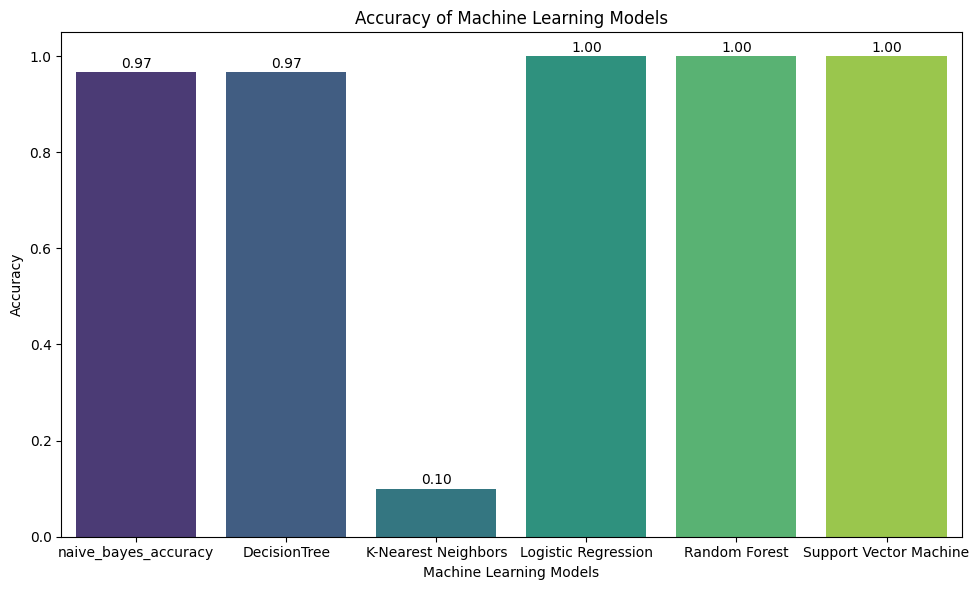

In [59]:
# Create a bar chart using Seaborn
plt.figure(figsize=(10, 6))  # Adjust the figure size as needed

sns.barplot(x=model_names, y=accuracies, palette='viridis')  # You can change the palette

# Add labels and a title
plt.xlabel('Machine Learning Models')
plt.ylabel('Accuracy')
plt.title('Accuracy of Machine Learning Models')

# Display the accuracy values on top of the bars
for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.01, f'{accuracy:.2f}', ha='center')

# Show the bar chart
plt.tight_layout()
plt.show()


In [60]:
from sklearn.metrics import classification_report

# Make predictions using your trained model (e.g., Naive Bayes)
naive_bayes_predictions = naive_bayes_classifier.predict(X_test)
y_pred = clf.predict(X_test)
y_pred_knn = knn_classifier.predict(X_test)
y_pred_lr = logistic_regression.predict(X_test)
y_pred_rf = random_forest.predict(X_test)
y_pred_svm = svm_classifier.predict(X_test)
# Generate the classification report
report = classification_report(y_test, naive_bayes_predictions)
report1 = classification_report(y_test, y_pred)
report2 = classification_report(y_test, y_pred_knn)
report3 = classification_report(y_test, y_pred_lr)
report4 = classification_report(y_test, y_pred_rf)
report5 = classification_report(y_test, y_pred_svm)
# Print the classification report
print(report)


                                 precision    recall  f1-score   support

                            HIV       1.00      1.00      1.00         1
               bipolar disorder       1.00      1.00      1.00         1
                     cellulitis       1.00      1.00      1.00         1
                      cirrhosis       1.00      1.00      1.00         1
                        colitis       1.00      1.00      1.00         1
                      confusion       1.00      1.00      1.00         1
                       delirium       1.00      1.00      1.00         1
                       delusion       1.00      1.00      1.00         1
                       dementia       1.00      1.00      1.00         1
                   endocarditis       1.00      1.00      1.00         1
gastroesophageal reflux disease       1.00      1.00      1.00         1
                       glaucoma       1.00      1.00      1.00         1
                    hemiparesis       1.00      1.

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.

In [61]:
print(report1)


                                 precision    recall  f1-score   support

                            HIV       1.00      1.00      1.00         1
               bipolar disorder       1.00      1.00      1.00         1
                     cellulitis       1.00      1.00      1.00         1
                      cirrhosis       1.00      1.00      1.00         1
                        colitis       1.00      1.00      1.00         1
                      confusion       1.00      1.00      1.00         1
                       delirium       1.00      1.00      1.00         1
                       delusion       1.00      1.00      1.00         1
                       dementia       1.00      1.00      1.00         1
                   endocarditis       1.00      1.00      1.00         1
gastroesophageal reflux disease       1.00      1.00      1.00         1
                       glaucoma       1.00      1.00      1.00         1
                    hemiparesis       1.00      1.

In [62]:
print(report2)


                                     precision    recall  f1-score   support

                                HIV       0.50      1.00      0.67         1
           accident cerebrovascular       0.00      0.00      0.00         0
acquired immuno-deficiency syndrome       0.00      0.00      0.00         0
                      affect labile       0.00      0.00      0.00         0
                      anxiety state       0.00      0.00      0.00         0
                          arthritis       0.00      0.00      0.00         0
       benign prostatic hypertrophy       0.00      0.00      0.00         0
                   biliary calculus       0.00      0.00      0.00         0
                   bipolar disorder       0.00      0.00      0.00         1
                     cardiomyopathy       0.00      0.00      0.00         0
                         cellulitis       0.00      0.00      0.00         1
                     cholelithiasis       0.00      0.00      0.00         

In [63]:
print(report3)


                                 precision    recall  f1-score   support

                            HIV       1.00      1.00      1.00         1
               bipolar disorder       1.00      1.00      1.00         1
                     cellulitis       1.00      1.00      1.00         1
                      cirrhosis       1.00      1.00      1.00         1
                        colitis       1.00      1.00      1.00         1
                      confusion       1.00      1.00      1.00         1
                       delirium       1.00      1.00      1.00         1
                       delusion       1.00      1.00      1.00         1
                       dementia       1.00      1.00      1.00         1
                   endocarditis       1.00      1.00      1.00         1
gastroesophageal reflux disease       1.00      1.00      1.00         1
                       glaucoma       1.00      1.00      1.00         1
                    hemiparesis       1.00      1.

In [64]:
print(report4)


                                 precision    recall  f1-score   support

                            HIV       1.00      1.00      1.00         1
               bipolar disorder       1.00      1.00      1.00         1
                     cellulitis       1.00      1.00      1.00         1
                      cirrhosis       1.00      1.00      1.00         1
                        colitis       1.00      1.00      1.00         1
                      confusion       1.00      1.00      1.00         1
                       delirium       1.00      1.00      1.00         1
                       delusion       1.00      1.00      1.00         1
                       dementia       1.00      1.00      1.00         1
                   endocarditis       1.00      1.00      1.00         1
gastroesophageal reflux disease       1.00      1.00      1.00         1
                       glaucoma       1.00      1.00      1.00         1
                    hemiparesis       1.00      1.

In [65]:
print(report5)


                                 precision    recall  f1-score   support

                            HIV       1.00      1.00      1.00         1
               bipolar disorder       1.00      1.00      1.00         1
                     cellulitis       1.00      1.00      1.00         1
                      cirrhosis       1.00      1.00      1.00         1
                        colitis       1.00      1.00      1.00         1
                      confusion       1.00      1.00      1.00         1
                       delirium       1.00      1.00      1.00         1
                       delusion       1.00      1.00      1.00         1
                       dementia       1.00      1.00      1.00         1
                   endocarditis       1.00      1.00      1.00         1
gastroesophageal reflux disease       1.00      1.00      1.00         1
                       glaucoma       1.00      1.00      1.00         1
                    hemiparesis       1.00      1.

In [66]:
disease_pred = clf.predict(X)

In [67]:
disease_real = y.values

In [68]:
for i in range(0, len(disease_real)):
    if disease_pred[i]!=disease_real[i]:
        print ('Pred: {0}\nActual: {1}\n'.format(disease_pred[i], disease_real[i]))

Pred: coronary arteriosclerosis
Actual: coronary heart disease

Pred: depression mental
Actual: depressive disorder

Pred: malignant neoplasms
Actual: primary malignant neoplasm

Pred: septicemia
Actual: systemic infection

